In [68]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from nsepy import get_history
from datetime import date
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [58]:
sbi = get_history(symbol = 'SBIN', start=date(2015,1,1), end=date(2022,3,1))
sbi.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2015-01-01,SBIN,EQ,311.85,312.45,315.00,310.70,314.0,314.00,313.67,6138488,1.925489e+14,58688,1877677,0.3059
2015-01-02,SBIN,EQ,314.00,314.35,318.30,314.35,315.6,315.25,316.80,9935094,3.147389e+14,79553,4221685,0.4249
2015-01-05,SBIN,EQ,315.25,316.25,316.80,312.10,312.8,312.75,313.84,9136716,2.867432e+14,88236,3845173,0.4208
2015-01-06,SBIN,EQ,312.75,310.00,311.10,298.70,299.9,299.90,305.14,15329257,4.677601e+14,169268,7424847,0.4844
2015-01-07,SBIN,EQ,299.90,300.00,302.55,295.15,301.4,300.15,299.95,15046745,4.513243e+14,147185,5631400,0.3743


In [59]:
sbi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1774 entries, 2015-01-01 to 2022-02-28
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Symbol              1774 non-null   object 
 1   Series              1774 non-null   object 
 2   Prev Close          1774 non-null   float64
 3   Open                1774 non-null   float64
 4   High                1774 non-null   float64
 5   Low                 1774 non-null   float64
 6   Last                1774 non-null   float64
 7   Close               1774 non-null   float64
 8   VWAP                1774 non-null   float64
 9   Volume              1774 non-null   int64  
 10  Turnover            1774 non-null   float64
 11  Trades              1774 non-null   int64  
 12  Deliverable Volume  1774 non-null   int64  
 13  %Deliverble         1774 non-null   float64
dtypes: float64(9), int64(3), object(2)
memory usage: 207.9+ KB


In [60]:
sbi.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,1774.000000,1774.000000,1774.000000,1774.000000,1774.000000,1774.000000,1774.000000,1.774000e+03,1.774000e+03,1.774000e+03,1.774000e+03,1774.000000
mean,289.777508,290.376127,294.205609,285.927988,289.925113,289.874098,290.122694,2.833725e+07,7.982072e+14,1.866943e+05,7.966778e+06,0.311538
std,78.485085,78.544354,79.388133,77.696985,78.609024,78.617590,78.586338,2.373675e+07,6.836523e+14,1.254017e+05,6.218707e+06,0.101141
min,150.850000,151.950000,153.200000,148.250000,151.100000,150.850000,151.820000,2.061681e+06,5.015678e+13,2.057900e+04,6.905790e+05,0.083700
25%,247.425000,247.800000,250.962500,244.525000,247.200000,247.425000,247.770000,1.386397e+07,3.769745e+14,1.029540e+05,4.371002e+06,0.237350
50%,277.375000,278.000000,281.025000,273.600000,277.375000,277.375000,277.725000,2.019767e+07,5.825439e+14,1.503330e+05,6.309051e+06,0.302650
75%,315.050000,315.762500,319.775000,311.150000,315.550000,315.212500,315.570000,3.413935e+07,1.007451e+15,2.296222e+05,9.813572e+06,0.377850
max,540.550000,543.950000,549.000000,537.150000,540.300000,540.550000,540.990000,2.626771e+08,8.549083e+15,1.155236e+06,1.333311e+08,0.716200


In [61]:
sbi.drop(['Turnover', 'Trades', 'Deliverable Volume', '%Deliverble', 'Symbol', 'Series'], axis=1, inplace=True)
sbi.head()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume
Date,,,,,,,,
2015-01-01,311.85,312.45,315.00,310.70,314.0,314.00,313.67,6138488
2015-01-02,314.00,314.35,318.30,314.35,315.6,315.25,316.80,9935094
2015-01-05,315.25,316.25,316.80,312.10,312.8,312.75,313.84,9136716
2015-01-06,312.75,310.00,311.10,298.70,299.9,299.90,305.14,15329257
2015-01-07,299.90,300.00,302.55,295.15,301.4,300.15,299.95,15046745


In [62]:
X = sbi.drop(['Close'], axis=1)
y = sbi['Close']
X.head()

,Prev Close,Open,High,Low,Last,VWAP,Volume
Date,,,,,,,
2015-01-01,311.85,312.45,315.00,310.70,314.0,313.67,6138488
2015-01-02,314.00,314.35,318.30,314.35,315.6,316.80,9935094
2015-01-05,315.25,316.25,316.80,312.10,312.8,313.84,9136716
2015-01-06,312.75,310.00,311.10,298.70,299.9,305.14,15329257
2015-01-07,299.90,300.00,302.55,295.15,301.4,299.95,15046745


In [63]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.25, shuffle=False)
print(f'''X_train shape - {X_train.shape}
y_train shape - {y_train.shape}
X_test shape - {X_test.shape}
y_test shape - {y_test.shape}
''')

X_train shape - (1330, 7)
y_train shape - (1330,)
X_test shape - (444, 7)
y_test shape - (444,)



In [64]:
X_train.head()

,Prev Close,Open,High,Low,Last,VWAP,Volume
Date,,,,,,,
2015-01-01,311.85,312.45,315.00,310.70,314.0,313.67,6138488
2015-01-02,314.00,314.35,318.30,314.35,315.6,316.80,9935094
2015-01-05,315.25,316.25,316.80,312.10,312.8,313.84,9136716
2015-01-06,312.75,310.00,311.10,298.70,299.9,305.14,15329257
2015-01-07,299.90,300.00,302.55,295.15,301.4,299.95,15046745


In [65]:
rf = RandomForestRegressor()

In [66]:
rf.fit(X_train, y_train)
pred = rf.predict(X_test)
pred.reshape(1,-1)

array([[152.6075, 152.3155, 158.0865, 158.4785, 159.804 , 169.136 ,
        170.164 , 174.9035, 174.174 , 189.192 , 186.7335, 183.838 ,
        188.617 , 177.2385, 177.7155, 173.3625, 172.196 , 171.8015,
        178.8705, 184.0505, 188.464 , 192.6735, 184.1735, 185.651 ,
        184.3955, 179.6835, 179.296 , 184.2955, 185.553 , 184.6055,
        188.3125, 188.2155, 192.1535, 197.8915, 196.427 , 192.973 ,
        186.5775, 184.1115, 185.9215, 189.67  , 190.3635, 194.2895,
        192.3965, 197.4925, 192.3045, 187.31  , 188.556 , 191.773 ,
        186.7475, 191.6935, 192.3515, 191.9575, 192.1385, 192.0995,
        190.7285, 193.7405, 196.093 , 202.068 , 202.146 , 197.3815,
        193.6825, 195.6115, 197.243 , 195.15  , 198.198 , 200.6195,
        207.999 , 209.8225, 215.2305, 223.337 , 212.8305, 217.7   ,
        216.539 , 214.4035, 208.7775, 208.3145, 203.7925, 196.0995,
        198.121 , 202.115 , 198.616 , 199.4015, 197.9145, 196.3295,
        192.8755, 185.03  , 186.452 , 184.087 , 

In [67]:
pred.shape

(444,)

In [73]:
y_test.head()

Date
2020-05-22    150.85
2020-05-26    151.40
2020-05-27    158.60
2020-05-28    158.20
2020-05-29    161.30
Name: Close, dtype: float64

C:\Users\chinn\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\chinn\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Date', ylabel='Close'>

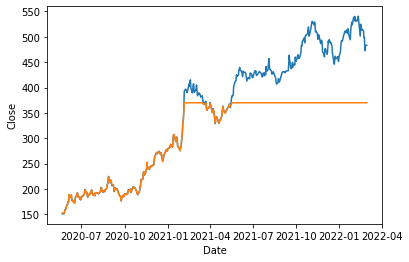

In [78]:
sns.lineplot(y_test.index, y_test)
sns.lineplot(y_test.index, pred)